In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [10,8]

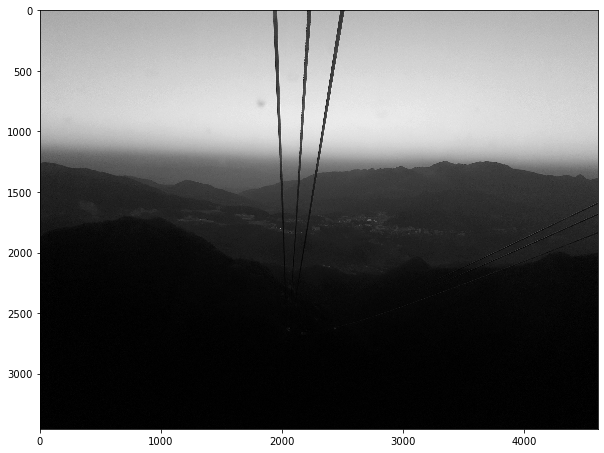

In [4]:
img = cv2.imread("2.jpg", 0)
plt.imshow(img, cmap='gray')


In [5]:
#Tinh histogram


In [6]:
#using cv2.calcHist()
hist = cv2.calcHist(
                    [img],
                    channels=[0],
                    mask=None, #full image
                    histSize=[256], #full scale
                    ranges=[0,256]
)

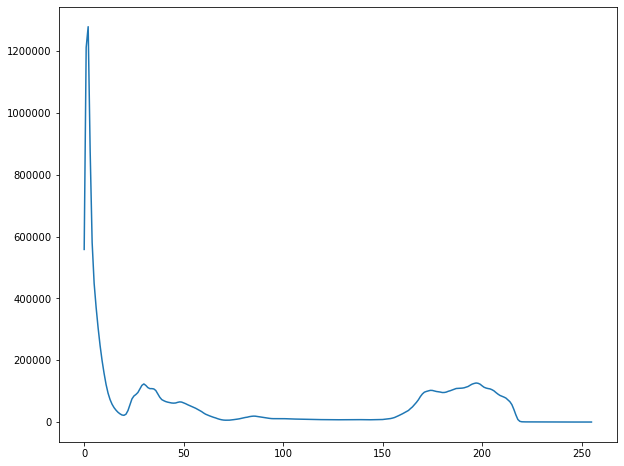

In [7]:
plt.plot(hist)

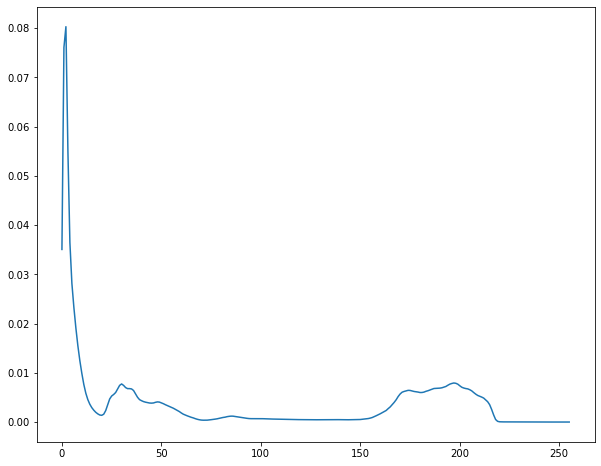

In [8]:
#normalized histogram
h, w = img.shape[:2]
normalized_hist = hist/(h*w)
plt.plot(normalized_hist)

In [9]:
def plot_img_and_hist(img):
    '''Draw image together with its histogram and cdf'''
    hist = cv2.calcHist(
                    [img],
                    channels=[0],
                    mask=None, #full image
                    histSize=[256], #full scale
                    ranges=[0,256]
    )
    h, w = img.shape[:2]
    normalized_hist = hist/(h*w)
    cdf = normalized_hist.cumsum()
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.plot(normalized_hist, 'r')
    plt.plot(cdf, 'b--')
    plt.legend(('histogram', 'cdf'), loc='upper left')

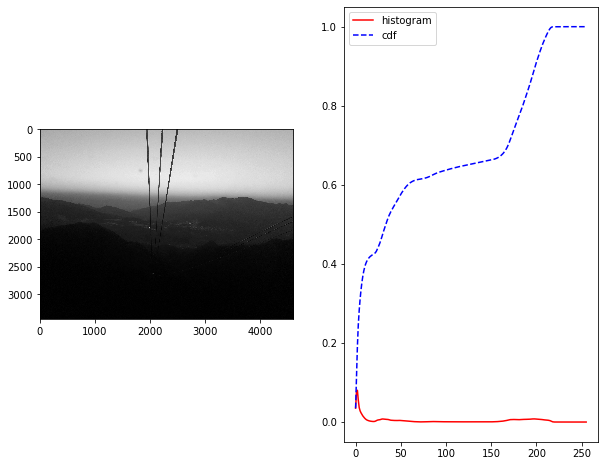

In [10]:
plot_img_and_hist(cv2.imread("2.jpg", 0))

In [11]:
def adjust_image_gamma_lookuptable(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    table = np.array([((i / 255.0) ** gamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

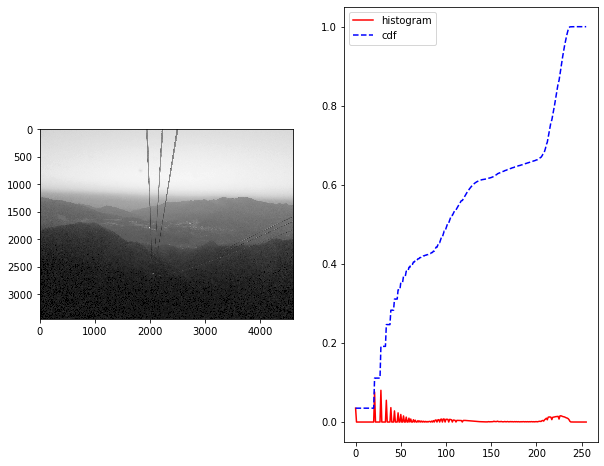

In [12]:
img_adjusted = adjust_image_gamma_lookuptable(img, gamma=0.45)
plot_img_and_hist(img_adjusted)

In [13]:
#can bang histogram

In [14]:
def hist_equalize(img):
    #1. calculate hist
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    #2. normalize hist
    h, w = img.shape[:2]
    hist = hist/(h*w)
    
    #3. calculate CDF
    cdf = np.cumsum(hist)
    s_k = (255 * cdf-0.5).astype("uint8")
    return s_k

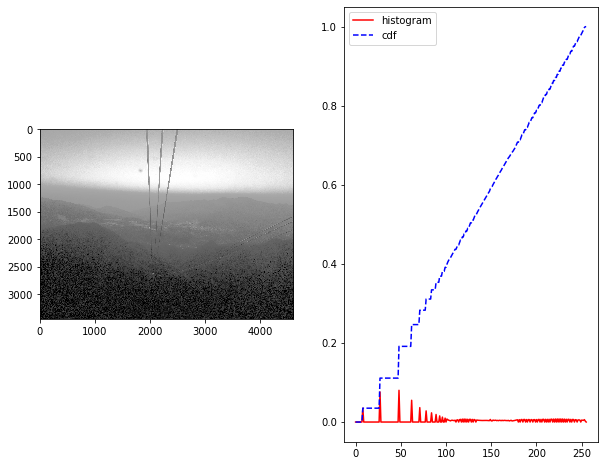

In [15]:
s_k = hist_equalize(img)
equalized_img = cv2.LUT(img, s_k)
plot_img_and_hist(equalized_img)

In [16]:
#using opencv function

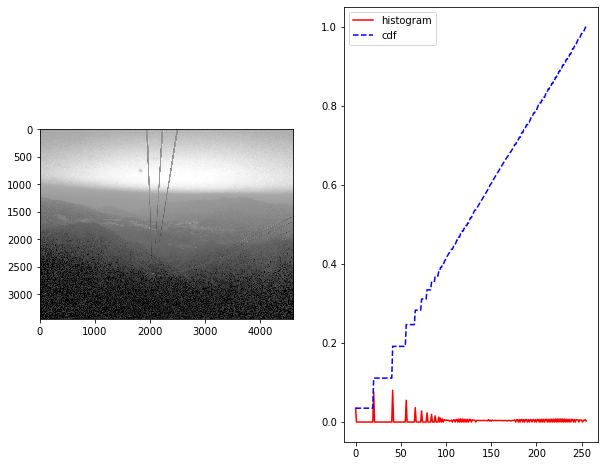

In [17]:
img_equalized = cv2.equalizeHist(img)
plot_img_and_hist(img_equalized)

# Code histogram matchining

In [18]:
#code histogram matching algorithm

### sample image

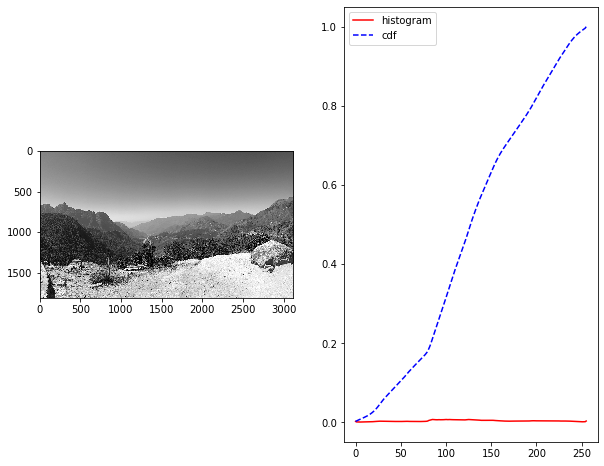

In [23]:
plot_img_and_hist(cv2.imread("sample.jpg", 0))

### origin image

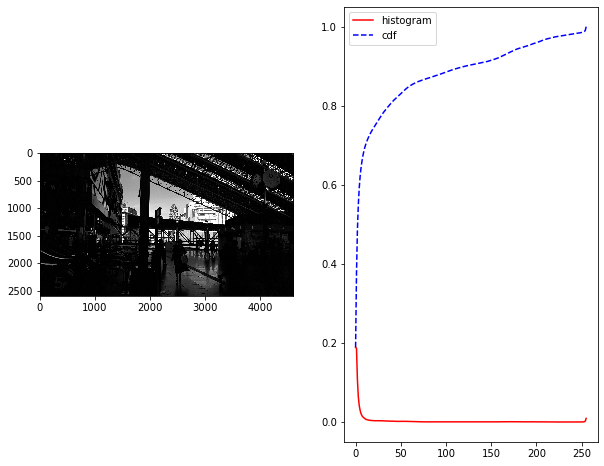

In [25]:
plot_img_and_hist(cv2.imread("low_contract.jpg", 0))

In [19]:
def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, -1)
    
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()

In [20]:
def hist_match(original, specified):
 
    oldshape = original.shape
    original = original.ravel()
    specified = specified.ravel()
 
    # get the set of unique pixel values and their corresponding indices and counts
    s_values, bin_idx, s_counts = np.unique(original, return_inverse=True,return_counts=True)
    t_values, t_counts = np.unique(specified, return_counts=True)
 
    # Calculate s_k for original image
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    
    # Calculate s_k for specified image
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
 
    # Round the values
    sour = np.around(s_quantiles*255)
    temp = np.around(t_quantiles*255)
    
    # Map the rounded values
    b=[]
    for data in sour[:]:
        b.append(find_nearest_above(temp,data))
    b= np.array(b,dtype='uint8')
 
    return b[bin_idx].reshape(oldshape)

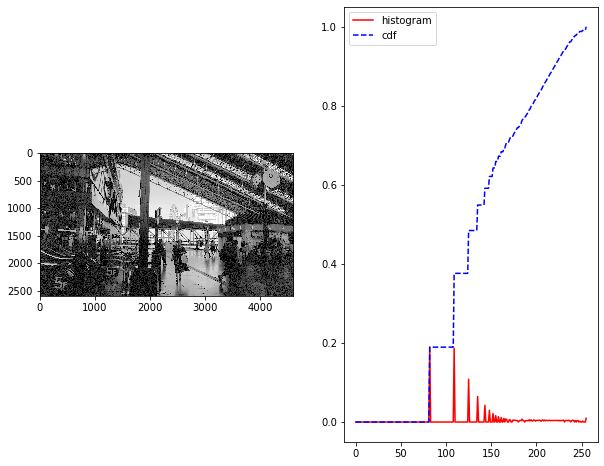

In [21]:
import cv2
import numpy as np
# Load the images in greyscale
original = cv2.imread('low_contract.jpg',0)
specified = cv2.imread('sample.jpg',0)
 
# perform Histogram Matching
a = hist_match(original, specified)
 
# Display the image
plot_img_and_hist(a)

#cv2.imshow('a',np.array(a,dtype='uint8'))
#cv2.imshow('a1',original)
#cv2.imshow('a2',specified)
#cv2.waitKey(0)
#cv2.destroyAllWindows()